In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [71]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.eps = 1e-10
        self.costs = []  # To store the cost at each iteration

    def sigmoid(self, z):
        """Compute the sigmoid of z."""
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y, y_predicted):
        """Compute the binary cross-entropy cost."""
        m = len(y)
        cost = - (1 / m) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        return cost

    def initialize_parameters(self, n_features):
        """Initialize weights and bias to zeros."""
        self.weights = np.zeros(n_features)
        self.bias = 0

    def update_step(self, X, y, y_predicted):
        """Perform a single update step of gradient descent."""
        n_samples = X.shape[0]

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        # Update weights and bias
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        """Fit the model to the training data."""
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        for i in range(self.n_iterations):
            # Compute linear model: z = Xw + b
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function to get probabilities
            y_predicted = self.sigmoid(linear_model)

            # Compute the cost (log-loss) for this iteration
            cost = self.compute_cost(y, y_predicted)
            self.costs.append(cost)

            # Update model parameters
            self.update_step(X, y, y_predicted)

            # Optional: print cost at intervals to monitor convergence
            if i % 50 == 0:
                print(f"Iteration {i}: Cost {cost:.4f}")

    def predict(self, X):
        """Make predictions using the learned model."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def plot_cost(self):
        """Plot the cost function over iterations."""
        plt.plot(range(self.n_iterations), self.costs)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost (Log-Loss)")
        plt.title("Cost Reduction over Iterations")
        plt.show()


Iteration 0: Cost 0.6931
Iteration 50: Cost 0.3352
Iteration 100: Cost 0.2543
Iteration 150: Cost 0.2155
Iteration 200: Cost 0.1917
Iteration 250: Cost 0.1754
Iteration 300: Cost 0.1633
Iteration 350: Cost 0.1540
Iteration 400: Cost 0.1465
Iteration 450: Cost 0.1403
Iteration 500: Cost 0.1350
Iteration 550: Cost 0.1306
Iteration 600: Cost 0.1267
Iteration 650: Cost 0.1232
Iteration 700: Cost 0.1202
Iteration 750: Cost 0.1174
Iteration 800: Cost 0.1150
Iteration 850: Cost 0.1127
Iteration 900: Cost 0.1107
Iteration 950: Cost 0.1088


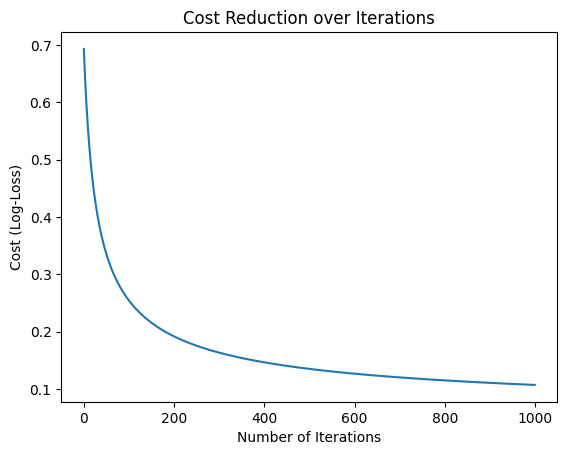

Logistic Regression Accuracy: 98.25%


In [76]:
# Initialize and train logistic regression with cost tracking
log_reg = LogisticRegression(learning_rate=0.01, n_iterations=1000)
log_reg.fit(X_train, y_train)

# Plot the cost over iterations
log_reg.plot_cost()
# Predict and evaluate the model
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = np.mean(y_pred_log_reg == y_test)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")
